In [1]:


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker



In [2]:

with open('checkpoint_both.pickle', 'rb') as f:
    avg_ramp_up = pickle.load(f)
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300

t_list = [np.nanmean(avg_dict['temperature']) for avg_dict in avg_ramp_up]
print(t_list)


[21.27830935553681, 23.78708632901418, 26.296510785603694, 28.810359680395333, 31.32582733099409, 33.85230218077735, 36.37971227632152, 38.91172660168984, 41.45949642263728, 43.98187058263545]


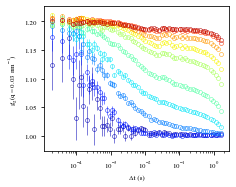

In [4]:

# Set figure width to 86 mm (convert to inches)
fig_width_mm = 86
inches_per_mm = 1 / 25.4
fig_width_in = fig_width_mm * inches_per_mm

# Set font size and font family
font_size = 7
font_family = 'Times New Roman'

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(fig_width_in, fig_width_in * 0.8)) #adjust height to look good.

g2_idx = 0
total_size = 0
for avg_dict in avg_ramp_up:
    total_size += len(avg_dict['temperature_x'])

accu_size = 0
for avg_dict in avg_ramp_up:
    curr_size = len(avg_dict['temperature_x'])
    idx = accu_size + np.arange(curr_size) * 1.0
    idx /= total_size
    accu_size += curr_size

    cmap = plt.get_cmap('jet')
    color = cmap(np.mean(idx))

    ax.errorbar(t_el, avg_dict['g2'][:, g2_idx], yerr=avg_dict['g2_err'][:, g2_idx],
                fmt='o', color=color, lw=0.5, ms=4, mew=0.5, mfc='none')
    ax.set_xscale('log')

# Add labels and adjust tick parameters
ax.set_xlabel('Δt (s)', fontsize=font_size)  # Replace with your x-axis label
ax.set_ylabel(r'g$\mathdefault{_2(q=0.03\ nm^{-1})}$', fontsize=font_size)  # Replace with your y-axis label
ax.tick_params(axis='both', which='major', labelsize=font_size)

plt.tight_layout() # Improves layout to avoid label cutoff.

plt.figure(fig)
plt.savefig('H02_RampUp_XPCS.pdf', bbox_inches="tight", dpi=600)
plt.show()
